# The zero-temperature structure of a White Dwarf
Juan Pablo Castro and Yannik leitlein

System of equations to integrate                         

$$\frac{dP}{dr} = - \rho(r)G\frac{m(r)}{r^{2}}$$
$$\frac{dm}{dr} = 4\pi r^{2} \rho(r)$$
Auxiliar equations
$$P_e = Af(x) = A[x(2x^{2} - 3)\sqrt{1+x^2} + 3\arcsin{x}]$$
$$\rho = B \mu x^{3}$$


In [46]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
#Ignore warnings
import warnings
warnings.filterwarnings('ignore') #ignore all warnings

its have been change variables P, M, r for them logarithm. Also, we work with the x variable instead of P
Se cambia las variables P, M, r por sus logaritmos y trabajamos con la variable x en vez de con P.
El sistema de ecuaciones queda de esta manera:
$$
\begin{equation}
    \frac{dx}{dr'} = \frac{-\rho G}{A df/dx} e^{m'-r'}
\end{equation}
$$
$$
\begin{equation}
    \frac{dm'}{dr'} = 4\pi \rho e^{3r'-m'}
\end{equation}
$$


Numerical computation of the structure of the white dwarf

In [47]:
# Segunda forma con las variables logaritmizadas

# Auxiliar functions of the program 
def get_initial_conditions(rho_):
    r_o = 100.0 #1.5 centimetros creó yo
    m_o = 4/3 *r_o**3 *np.pi*rho_  #
    log_m_o = np.log(m_o)
    x_o = (rho_/(B*miu_e))**(1/3)  
    P_o = A*f(x_o)

    return (r_o, m_o, log_m_o , x_o, P_o)


# Ecuaciones auxiliares
def f(x):
    return (x*(2*x**2 -3)*(1+x**2)**(1/2) + 3*np.arcsinh(x))

def dfdx(x):
    return 8*x**4/(1+x**2)**(1/2)

def Rho(x):
    return B*miu_e* x**3

def dPdx(x):
    return (dfdx(x))/(A*f(x))

# Stop condition
def event(t, c_o):
    P = A*f(c_o[0])

    InC = get_initial_conditions(rho_o[i])
    condition = P/InC[-1] - n

    return condition


#Sistema de ecuacciones diferenciales a integrar
def System_2(r, c_o):    
    x, m = c_o

    dxdr = (-1)*Rho(x)*G*np.exp(m) /(A*dfdx(x)*np.e**(r))

    dmdr = 4*np.pi*np.e**(3*r)*Rho(x)/(np.e**(m))

    return np.array([dxdr,dmdr])

def get_structure_profile(ln_r, x, ln_m):
    # Obtenermos las variables fisicas
    rho_sol = Rho(x) # densidad
    P_sol = A*f(x)
    M_sol = np.e**(ln_m)
    r_sol = np.e**(ln_r)
    return [rho_sol, P_sol, M_sol, r_sol, ln_r, ln_m, x]

# New variables logaraized

def White_dwarf_structure(rho_):
    init_cond = get_initial_conditions(rho_)
    x = init_cond[3]
    log_m_o = init_cond[2]
    r_o = init_cond[0]

    c_o = np.array([x, log_m_o]) # Inital program conditions
    r = np.linspace(r_o, 1e9 , 10000000) # In centimeters, without zero to avoid singularity
    log_r = np.log(r)

    #integration
    event.terminal = True
    sol_2 = solve_ivp( System_2, (log_r[0],log_r[-1]), c_o, t_eval = log_r, method = 'RK45', events=event)

    # Sacamos los resultados de la integración numerica
    ln_r = sol_2.t
    x = sol_2.y[0]
    ln_m = sol_2.y[1]

    structure_profile = get_structure_profile(ln_r, x, ln_m) 

    return structure_profile



#################### ///////////////////// MAIN PROGRAM \\\\\\\\\\\\\\\\\\\\\\\\ ############################

# Contants
A = 6.022e22 #cgs
B = 9.74e5#cgs
G = 6.674e-8 #cgs
M_sun = 1.989e33 #grams wtf
rho_sun = 1.41# gram/cn^{3}
R_sun = 6.957e10#cn
R_earth = 631.1e6

#Parameters
miu_e = 2 #two nucleons per electron
rho_o = np.array([1e10, 1e9, 1e8, 1e7, 1e6, 1e5])# average density of Sirius B en cgs  ,1e9,1e8,1e7,1e6,1e5
# computational parameters
n = 1e-6 # limit for P(r)/Pc to stop computation 
# it is not much smaller because program is delayed


strc = [] # strcuture profile

for i in range(len(rho_o)):
    strc.append(White_dwarf_structure(rho_o[i]))

# To be clear, strc is a tensor of level 3, it means a cubic matrix.
# The first index is the number of structures or white dwarfs obtained, one for each density.
# The second index is the properties of our white dwarf as mass, radio, pressure and them logarithms.
# The third index is the value of that quantity in the r point of the white dwarf.


Graphics for the structure of the white dwarfs

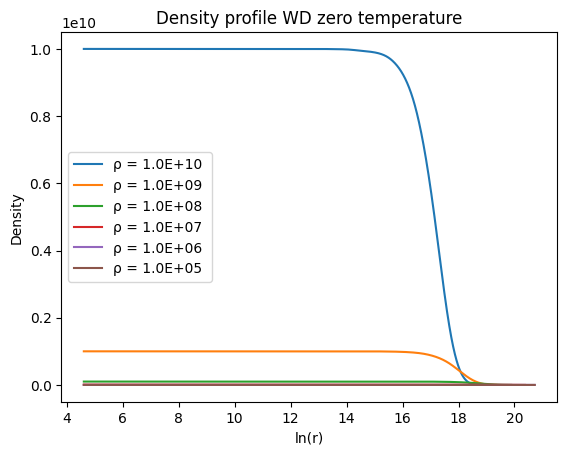

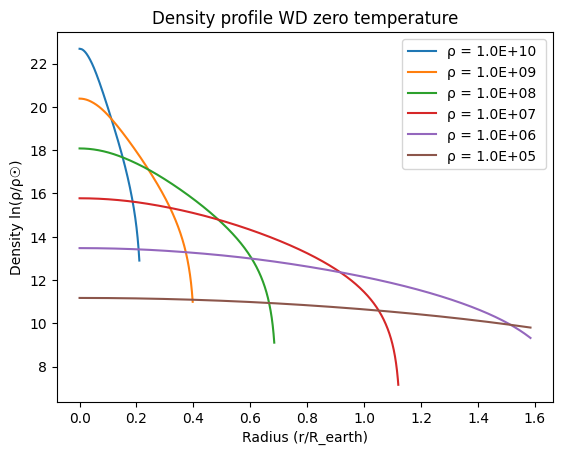

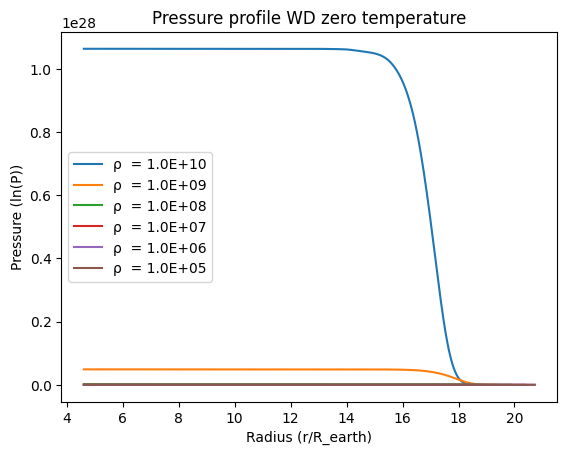

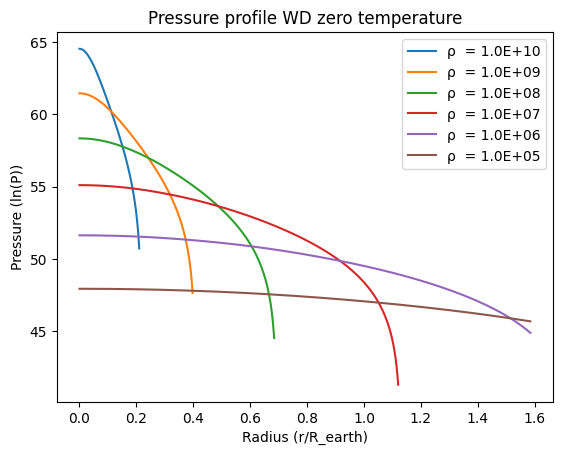

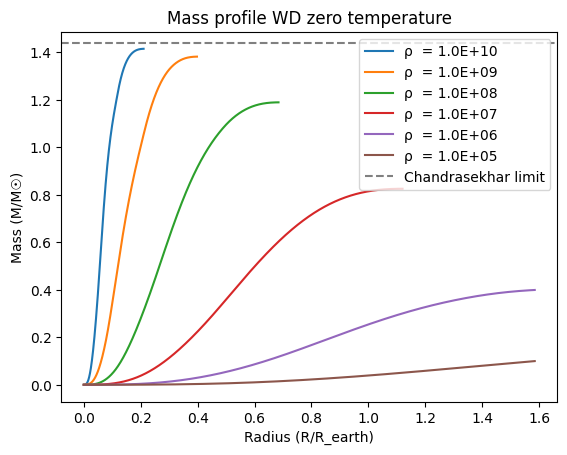

In [48]:
#Some useful symbols
cero_symbol = '\u2080'
rho_symbol = '\u03C1'
sun_symbol = '\u2609'

# Graphics
fig1, ax1= plt.subplots()
fig11, ax11= plt.subplots()
fig2, ax2= plt.subplots()
fig22, ax22= plt.subplots()
fig3, ax3= plt.subplots()

r_l = []
m_l = []
for i in range(len(rho_o)):
    r_l.append(strc[i][3])
    m_l.append(strc[i][2])
    
    
    #ax1.plot(strc[i][-3],np.log(strc[i][0]))
    ax1.plot(np.log(strc[i][3]), strc[i][0], label=f"{rho_symbol} = {rho_o[i]:.1E} ") #rho(ln_r) normalizados con radio y densidad solar
    ax11.plot(strc[i][3]/R_earth, np.log(strc[i][0]/rho_sun), label=f"{rho_symbol} = {rho_o[i]:.1E} ") #ln_rho(r)
    ax2.plot(strc[i][-3], strc[i][1] , label=f"{rho_symbol}  = {rho_o[i]:.1E}") #P(ln_r)
    ax22.plot(strc[i][3]/R_earth,np.log(strc[i][1]), label=f"{rho_symbol}  = {rho_o[i]:.1E}") #ln_P(r)
    ax3.plot(strc[i][3]/R_earth, strc[i][2]/M_sun, label=f"{rho_symbol}  = {rho_o[i]:.1E}") #M(r)
    
    #ax3.plot(strc[i][2]/M_sun, strc[i][3]/R_sun,  label=f"{rho_symbol}  = {rho_o[i]:.1E}") #r(M)
ax3.axhline(y= 1.44 , xmin=0, xmax=1, color = 'gray', ls = '--', label ="Chandrasekhar limit") # That value is the chandrasekar limit


r = np.array(r_l)
m = np.array(m_l)



ax1.legend()
ax11.legend()
ax2.legend()
ax22.legend()
ax3.legend()

ax1.set_title("Density profile WD zero temperature")
ax1.set_xlabel("ln(r)")
ax1.set_ylabel("Density")

ax11.set_title("Density profile WD zero temperature")
ax11.set_xlabel("Radius (r/R_earth)")
ax11.set_ylabel(f"Density ln({rho_symbol}/{rho_symbol + sun_symbol})")

ax2.set_title("Pressure profile WD zero temperature")
ax2.set_xlabel("Radius (r/R_earth)")
ax2.set_ylabel("Pressure (ln(P))")

ax22.set_title("Pressure profile WD zero temperature")
ax22.set_xlabel("Radius (r/R_earth)")
ax22.set_ylabel("Pressure (ln(P))")

ax3.set_title("Mass profile WD zero temperature")
ax3.set_xlabel(f"Radius (R/R_earth)")
ax3.set_ylabel(f"Mass (M/M{sun_symbol})")

plt.show(fig1)
plt.show(fig11)
plt.show(fig2)
plt.show(fig22)
plt.show(fig3)

Graficas teoricas

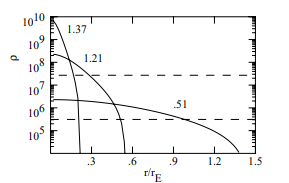

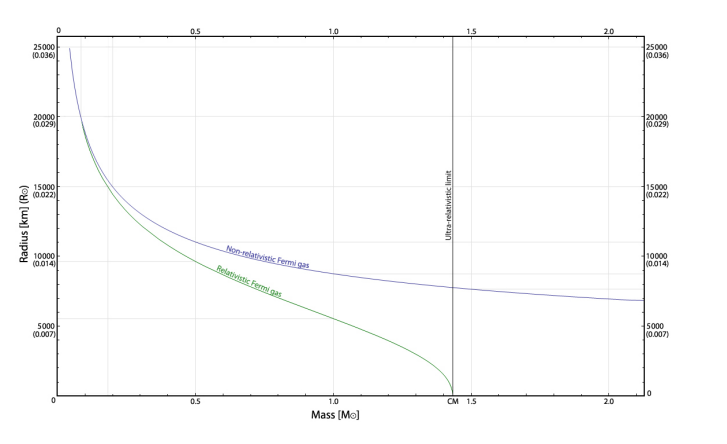

Analysis mass-radious relation 

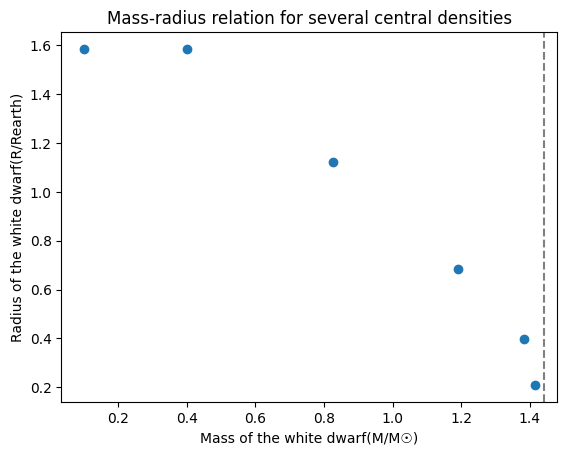

In [49]:
# we obtain the maximum radii for the white dwarfs
R_max =[]
M_max =[]
for i in range(len(rho_o)):
    R_max.append(r[i][-1])
    M_max.append(m[i][-1])

R_max = np.array(R_max)
M_max = np.array(M_max)

plt.scatter(M_max/M_sun, R_max/R_earth)
plt.title("Mass-radius relation for several central densities")
plt.xlabel(f"Mass of the white dwarf(M/M{sun_symbol})")
plt.ylabel(f"Radius of the white dwarf(R/Rearth)")
plt.axvline(x=1.44, ymin=0, ymax=1, color = 'gray', ls = '--', label ="Chandrasekhar limit") # That value is the chandrasekar limit


### Location in Hertzsprung Russell diagram

In short the aim of this part is to obtain the location of our white dwarfs in the Hertzsprung Russell diagram.
To do that, we need to get the luminosity which can be achieved starting with the mass of the white dwarf. 
In addition, we need the temperature which depends of the luminosity and the radius that we know thanks to our simulation.

In [50]:
#constants 
L_sun = 3.827e26 # Watts
BoltzmanC= 5.67e-8 # W/m2K4 

We invert the next equation to compute the mass of the star which gave rise to our white dwarfs

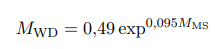

In [51]:
print(M_max/M_sun)
M_ms = np.log(M_max/(M_sun*0.49))/0.095 # M max = white dwarf mass
M_ms

[1.41474122 1.38169801 1.18922943 0.82536788 0.39919422 0.09973598]


array([ 11.16101599,  10.91224284,   9.3332152 ,   5.48867163,
        -2.15744543, -16.75661949])

We compute the timelife in the main sequence making use of the next equation

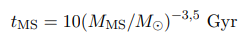

In [52]:
t_ms = 10*(M_ms)**(-3.5)
t_ms

array([0.00215296, 0.0023297 , 0.00402616, 0.02581455,        nan,
              nan])

Along with the t_cluster already fixed we calculate white dwarf age: t_cool = t_cluster - t_mainsequence- t_born
t_born will be 0 so the star was born along with the globular cluster
Then we use the Mestel law to determine the luminosity of the white dwarf

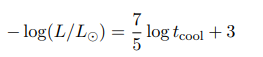


In [56]:
t_cluster = 6# Gyr
t_born = 0
t_coolWD = t_cluster - t_ms - t_born

log_L_wd_new = (-1)*((7/5)*np.log10(np.array(t_coolWD)) + 3)
L_wd_new = 10**(log_L_wd_new)
L_wd_new

array([8.14341298e-05, 8.14374895e-05, 8.14697490e-05, 8.18860309e-05,
                  nan,            nan])

Calculamos la temperatura con la ley de Boltzman

In [57]:
T_wd_new =( L_wd_new*L_sun/(4*np.pi*BoltzmanC*(R_max/100)**2))**(1/4)
T_wd_new

array([12560.84799225,  9130.29811016,  6960.58006954,  5446.9809195 ,
                  nan,            nan])

[]

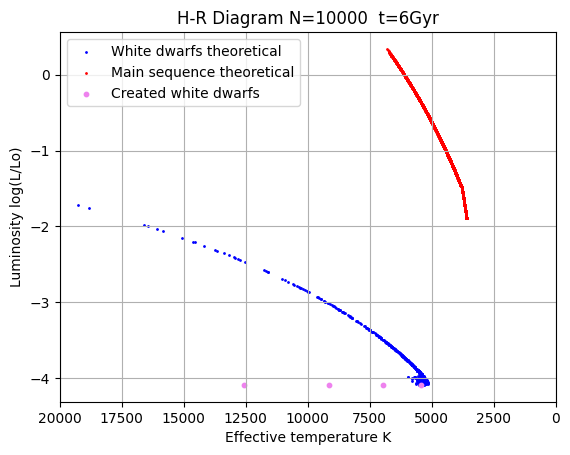

In [58]:

# load the data of the simulated stars
loaded_data = np.load('HRdiagram.npz')
T_wd = loaded_data['array1']
T_ms = loaded_data['array2']
log_L_wd = loaded_data['array3']
log_L_ms = loaded_data['array4']


# Graphic for Hertzsprung Russel diagram
fig, ax = plt.subplots()

ax.set_title(f'H-R Diagram N={10000}  t={6}Gyr')
ax.set_ylabel("Luminosity log(L/Lo)")
ax.grid()
ax.set_xlabel("Effective temperature K")
ax.invert_xaxis()
ax.set_xlim(20000,0)

ax.scatter(T_wd, log_L_wd, s=1, color='blue', label="White dwarfs theoretical")
ax.scatter(T_ms , log_L_ms, s=1, color='red', label="Main sequence theoretical")
ax.scatter(T_wd_new, log_L_wd_new, s=10, color= 'violet', label="Created white dwarfs")
ax.legend()
ax.plot()